<a href="https://colab.research.google.com/github/peisuke/ml-works/blob/main/2/2_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 2.1: 線形回帰
- 目的
    - 線形回帰を行う
- 内容
    - ボストン住宅価格データセットにおいて、平均部屋数と住宅価格の関連性を明らかにする
- 参考サイト
    - 本コードは以下のサイトを参考にしました
    - https://qiita.com/0NE_shoT_/items/08376b08783cd554b02e

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]
features = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT"]

In [3]:
# 説明変数(boston.data)をDataFrameに保存
boston_df = pd.DataFrame(data, columns = features)

# 目的変数(boston.target)もDataFrameに追加
boston_df['MEDV'] = target

In [4]:
# データの可視化
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


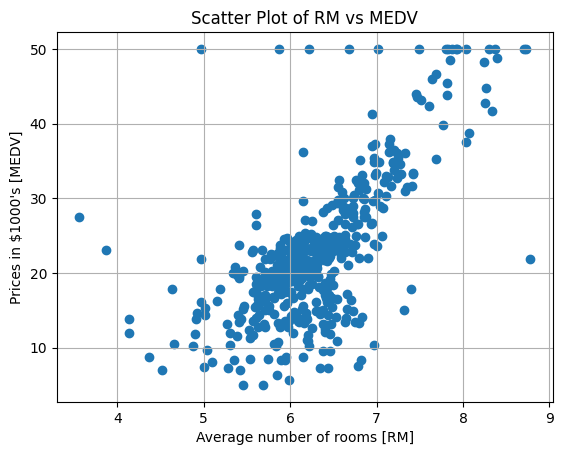

In [5]:
# 平均部屋数と住宅価格の散布図をプロット
plt.scatter(boston_df['RM'], boston_df['MEDV']) 

plt.title('Scatter Plot of RM vs MEDV') # 図のタイトル
plt.xlabel('Average number of rooms [RM]') # x軸のラベル
plt.ylabel('Prices in $1000\'s [MEDV]')    # y軸のラベル
plt.grid() # グリッド線を表示

plt.show() # 図の表示

In [6]:
# 平均部屋数と住宅価格の相関関係を計算
boston_df[['RM','MEDV']].corr()

,RM,MEDV
RM,1.00000,0.69536
MEDV,0.69536,1.00000


In [7]:
# 線形回帰を行う
lr = LinearRegression()

X = boston_df[['RM']].values # 説明変数（Numpyの配列）
Y = boston_df['MEDV'].values # 目的変数（Numpyの配列）

# 線形モデルのパラメータを学習
lr.fit(X, Y)

LinearRegression()

In [8]:
# 学習したパラメータを表示
print('coefficient = ', lr.coef_[0])
print('intercept = ', lr.intercept_)

coefficient =  9.10210898118031
intercept =  -34.67062077643857


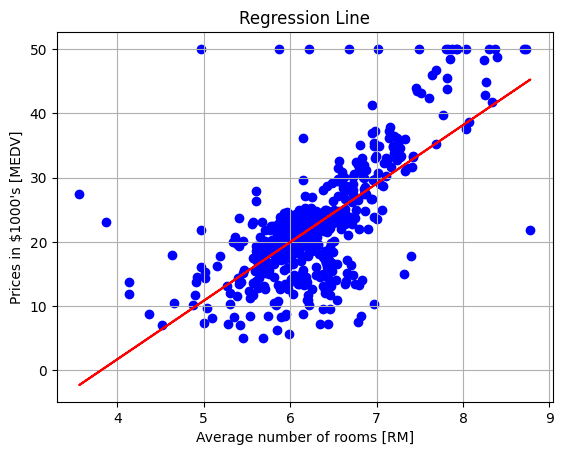

In [9]:
# 説明変数と目的変数のデータ点の散布図をプロット
plt.scatter(X, Y, color = 'blue')

# 回帰直線をプロット
plt.plot(X, lr.predict(X), color = 'red') 

plt.title('Regression Line') # 図のタイトル
plt.xlabel('Average number of rooms [RM]') # x軸のラベル
plt.ylabel('Prices in $1000\'s [MEDV]') # y軸のラベル
plt.grid() # グリッド線を表示

plt.show() # 図の表示